# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [164]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_22414/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

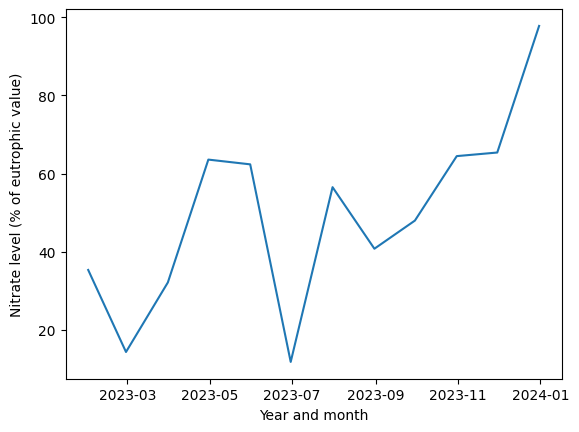

In [165]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_22414/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

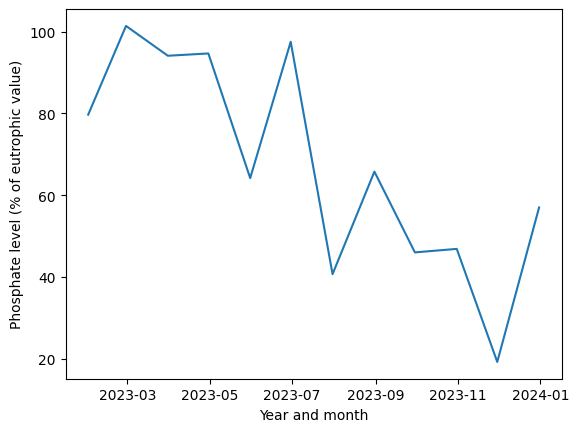

In [166]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

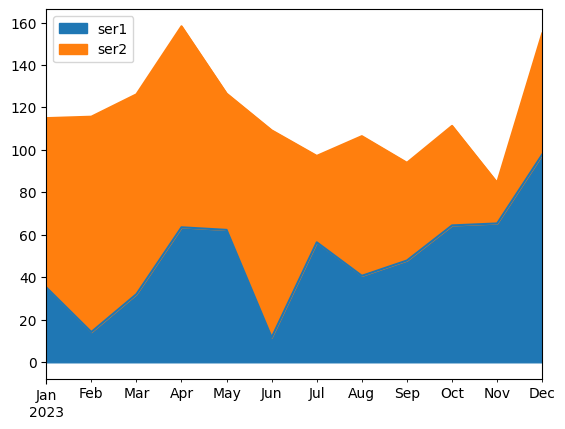

In [167]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

An area plot is great for showing how nitrate and phosphate levels change together over time, but it can make it harder to see each one individually. Separate line graphs keep things clearer, especially if their trends move differently. To make the area plot easier to read, I’d tweak the transparency, pick distinct colors, and maybe add labels to highlight key changes. It really depends on whether you want to focus on the big picture or the details.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

In [168]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("carclaims.csv")  # Replace with actual file path
df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [169]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)



                    WeekOfMonth  WeekOfMonthClaimed       Age  PolicyNumber  \
WeekOfMonth            1.000000            0.275400 -0.004810     -0.007797   
WeekOfMonthClaimed     0.275400            1.000000  0.001859      0.011665   
Age                   -0.004810            0.001859  1.000000      0.025944   
PolicyNumber          -0.007797            0.011665  0.025944      1.000000   
RepNumber              0.005283            0.008908 -0.007063      0.008990   
Deductible            -0.003993            0.005457  0.069420      0.002133   
DriverRating          -0.016817           -0.000048  0.001668     -0.012312   
Year                  -0.003906            0.012175  0.025197      0.936513   

                    RepNumber  Deductible  DriverRating      Year  
WeekOfMonth          0.005283   -0.003993     -0.016817 -0.003906  
WeekOfMonthClaimed   0.008908    0.005457     -0.000048  0.012175  
Age                 -0.007063    0.069420      0.001668  0.025197  
PolicyNumber    

The correlation between PolicyNumber and Year is very high (0.94), which suggests that these two variables might be redundant. 
WeekOfMonth and Age have a correlation of -0.0048.
DriverRating and Age show almost no relationship.

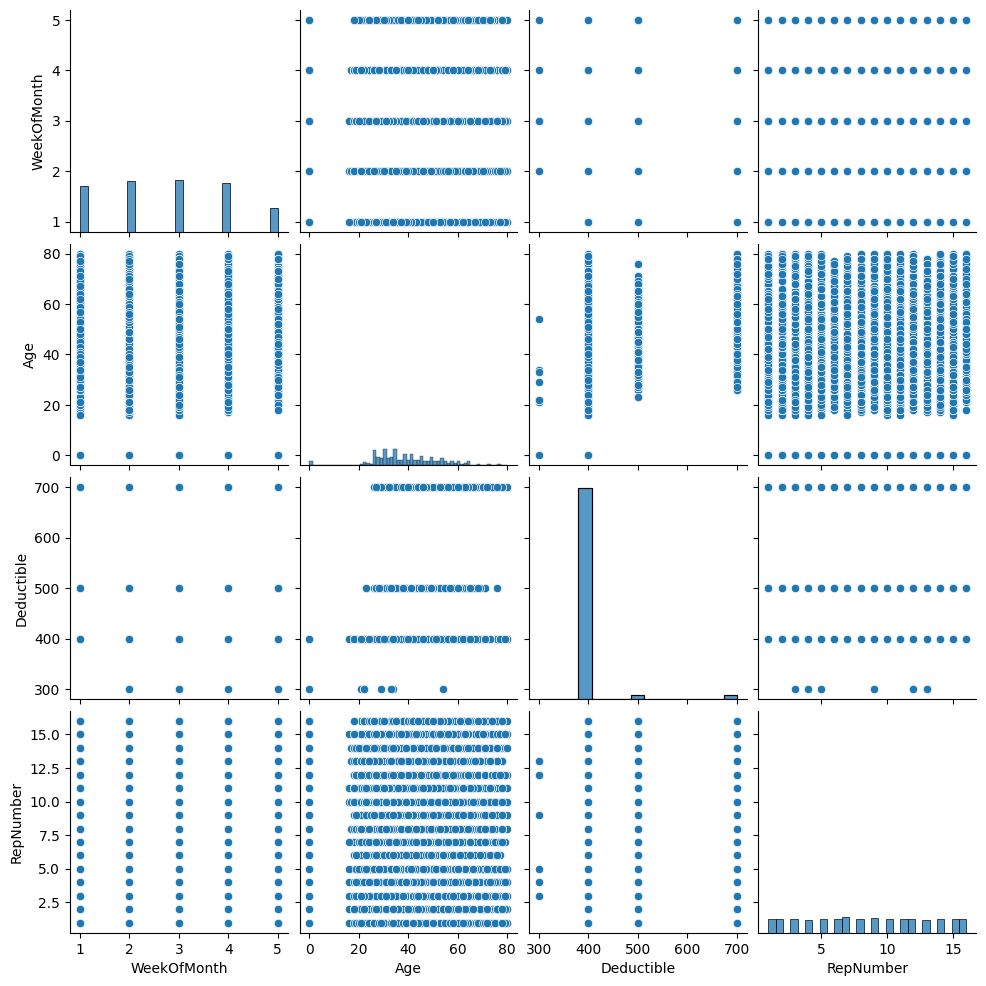

In [170]:
sns.pairplot(df[['WeekOfMonth', 'Age', 'Deductible', 'RepNumber']])
plt.show()


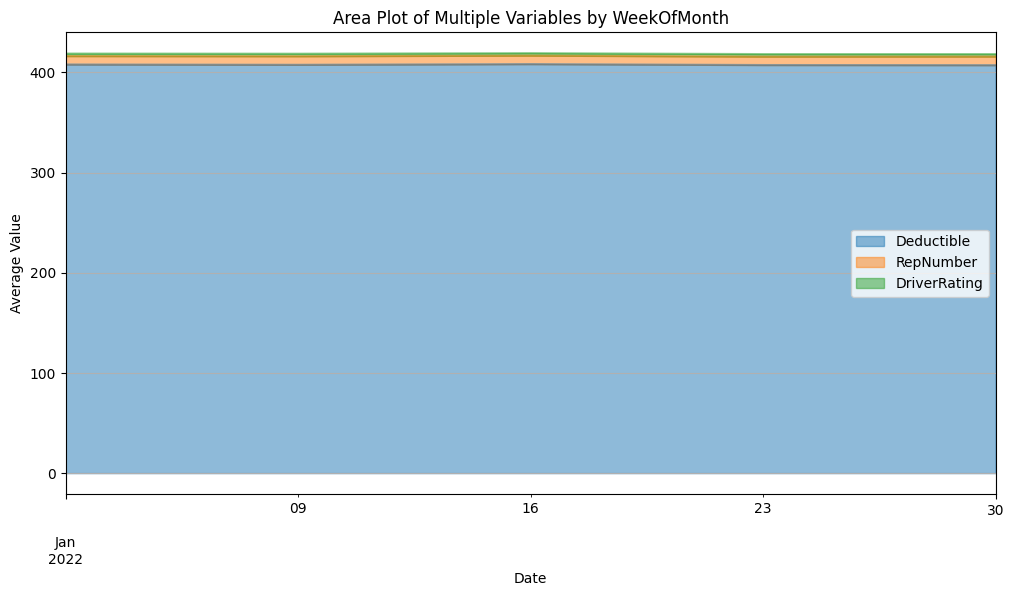

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

datearray = pd.date_range(start='2022-01-01', periods=df['WeekOfMonth'].nunique(), freq='W')

df_area = df.groupby('WeekOfMonth')[['Deductible', 'RepNumber', 'DriverRating']].mean()

df_area.index = datearray

df_area.plot.area(figsize=(12, 6), alpha=0.5)

plt.title('Area Plot of Multiple Variables by WeekOfMonth')
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.grid(True)
plt.show()



In [172]:

print(df[['Deductible', 'RepNumber', 'DriverRating']].describe())


         Deductible     RepNumber  DriverRating
count  15420.000000  15420.000000  15420.000000
mean     407.704280      8.483268      2.487808
std       43.950998      4.599948      1.119453
min      300.000000      1.000000      1.000000
25%      400.000000      5.000000      1.000000
50%      400.000000      8.000000      2.000000
75%      400.000000     12.000000      3.000000
max      700.000000     16.000000      4.000000


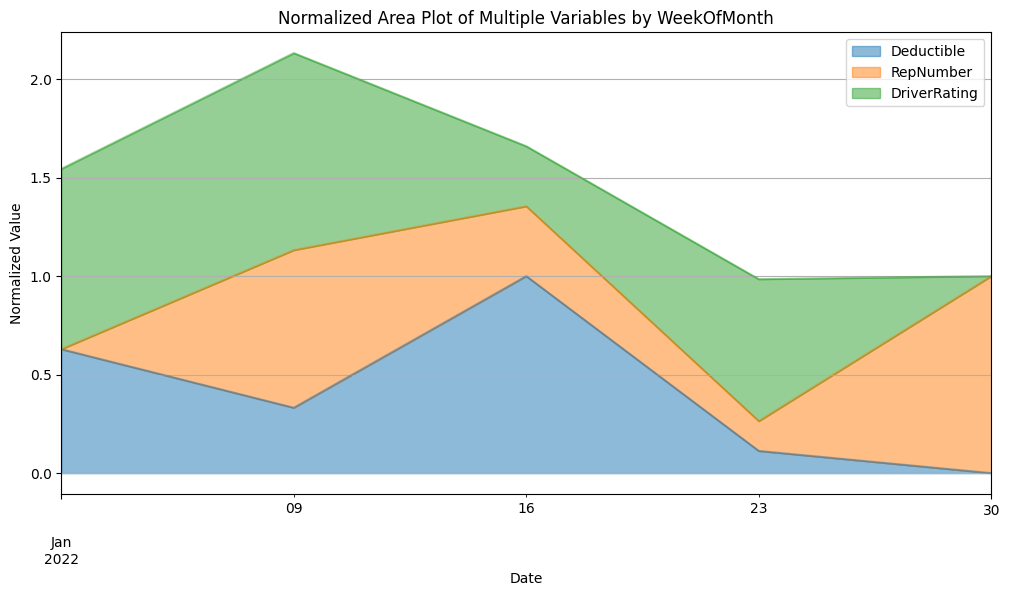

In [173]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_area_normalized = scaler.fit_transform(df_area)

df_area_normalized = pd.DataFrame(df_area_normalized, columns=df_area.columns, index=df_area.index)


df_area_normalized.plot.area(figsize=(12, 6), alpha=0.5)

plt.title('Normalized Area Plot of Multiple Variables by WeekOfMonth')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.grid(True)
plt.show()



# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

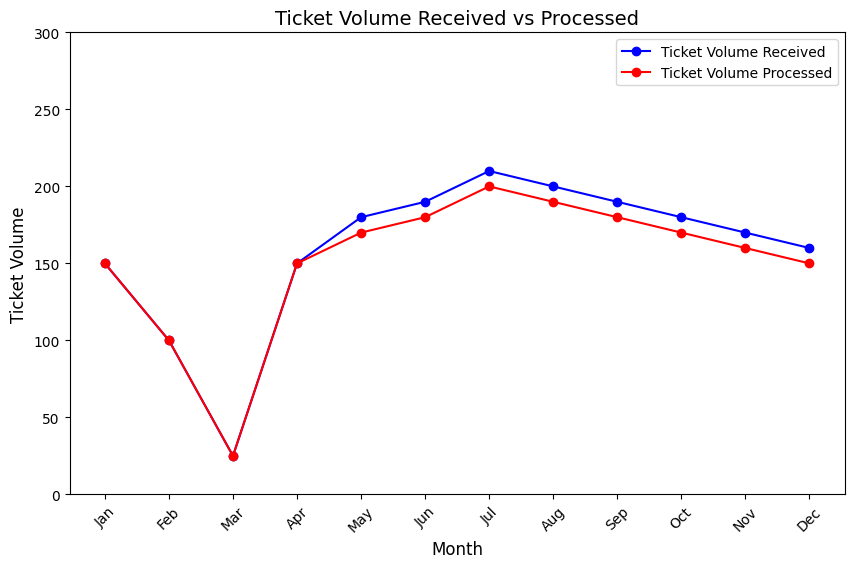

In [174]:
import matplotlib.pyplot as plt
import numpy as np

#X axis
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#Tickets
ticket_received = np.array([150, 100, 25, 150, 180, 190, 210, 200, 190, 180, 170, 160])  # Blue line
ticket_processed = np.array([150, 100, 25, 150, 170, 180, 200, 190, 180, 170, 160, 150])  # Red line


plt.figure(figsize=(10, 6))
plt.plot(months, ticket_received, color='blue', label='Ticket Volume Received', marker='o')
plt.plot(months, ticket_processed, color='red', label='Ticket Volume Processed', marker='o')


plt.title('Ticket Volume Received vs Processed', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Ticket Volume', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 301, 50))
plt.legend()

# Show the plot
plt.show()
